# F77 - Computer und Datenverarbeitung

## Versuchsteil A

$$\nu_n$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import uncertainties as unc
import uncertainties.unumpy as unp
from helper import *

plt.style.use('dark_background')

%matplotlib inline

str_f = 'f / Hz'
str_A = 'A / V'
str_dA = 'dA / V'


def lorentz(omega, gamma, f_0, omega_0):    
    return f_0 / np.sqrt((omega_0**2-omega**2)**2+gamma**2*omega**2)

In [2]:
df_a = pd.read_csv('data/a.dat', decimal=',', delimiter='\t')

df_a1 = df_a.ix[df_a[str_f] < 400]
df_a2 = df_a.ix[df_a[str_f] > 400]
df_a2 = df_a2.ix[df_a2[str_f] < 3e3]
df_a3 = df_a.ix[df_a[str_f] > 3e3]

\omega_0 &= \SI{-2.805724e+02\pm 20.0028184080724938643}{Hz}\\
f_0 &= \SI{4.827738e-02\pm 29.878099146081992e-05}{V}\\
\gamma &= \SI{1.899400e+00\pm 20.006499352687372838}{}\\
\chi^2_{red} &= \SI{2.005814e+00\pm 20}{}\\


<IPython.core.display.Math object>

\omega_0 &= \SI{-2.805724e+02\pm 20.0028184080724938643}{Hz}\\
f_0 &= \SI{4.827738e-02\pm 29.878099146081992e-05}{V}\\
\gamma &= \SI{1.899400e+00\pm 20.006499352687372838}{}\\
\chi^2_{red} &= \SI{2.005814e+00\pm 20}{}\\
\omega_0 &= \SI{1.775778e+03\pm 20.04139935917648119}{Hz}\\
f_0 &= \SI{3.628043e-02\pm 20.0005376307618423963}{V}\\
\gamma &= \SI{-4.540304e+00\pm 20.10076940162051358}{}\\
\chi^2_{red} &= \SI{5.365946e+00\pm 20}{}\\


<IPython.core.display.Math object>

\omega_0 &= \SI{-2.805724e+02\pm 20.0028184080724938643}{Hz}\\
f_0 &= \SI{4.827738e-02\pm 29.878099146081992e-05}{V}\\
\gamma &= \SI{1.899400e+00\pm 20.006499352687372838}{}\\
\chi^2_{red} &= \SI{2.005814e+00\pm 20}{}\\
\omega_0 &= \SI{1.775778e+03\pm 20.04139935917648119}{Hz}\\
f_0 &= \SI{3.628043e-02\pm 20.0005376307618423963}{V}\\
\gamma &= \SI{-4.540304e+00\pm 20.10076940162051358}{}\\
\chi^2_{red} &= \SI{5.365946e+00\pm 20}{}\\
\omega_0 &= \SI{-4.941521e+03\pm 20.2577168105489462}{Hz}\\
f_0 &= \SI{6.670398e-02\pm 20.0010509447213807523}{V}\\
\gamma &= \SI{2.764014e+01\pm 20.684986272741275}{}\\
\chi^2_{red} &= \SI{8.808734e-01\pm 20}{}\\


<IPython.core.display.Math object>

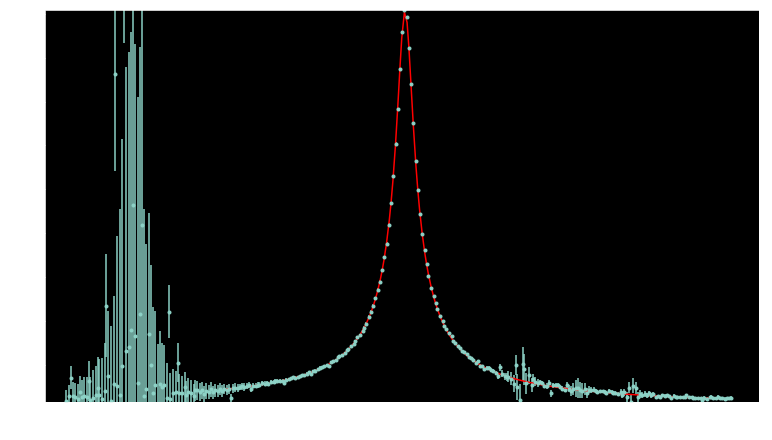

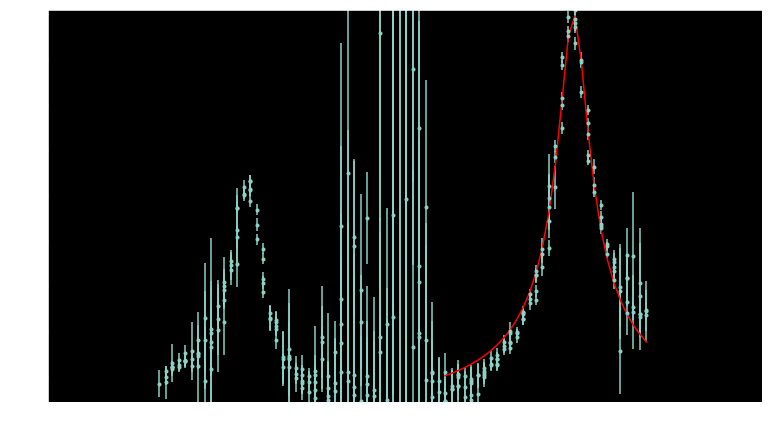

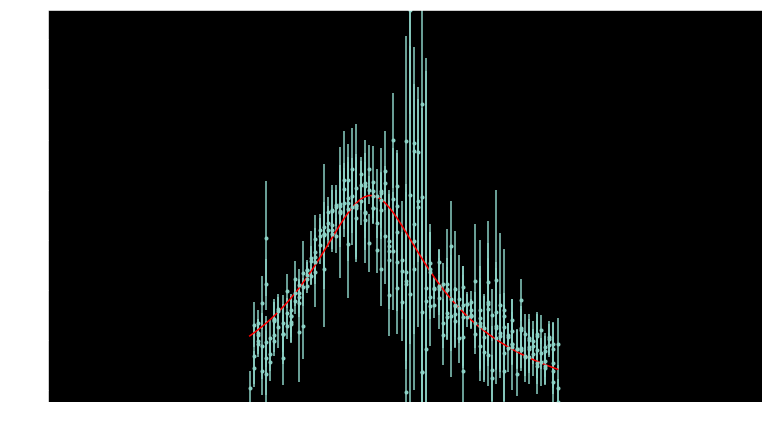

In [3]:
for it, e in enumerate([df_a1, df_a2, df_a3]):
    lmod = Model(lorentz)
    
    if it == 0:
        x = e[str_f][e[str_f] > 260]
        y = e[str_A][e[str_f] > 260]
        dy = e[str_dA][e[str_f] > 260]
    elif it == 1:
        x = e[str_f][e[str_f] > 1755]
        y = e[str_A][e[str_f] > 1755]
        dy = e[str_dA][e[str_f] > 1755]
    else:
        x = e[str_f]
        y = e[str_A]
        dy = e[str_dA]
    
    fitdata = lmod.fit(
        y, 
        omega=x, 
        gamma=2, 
        f_0=np.max(y), 
        omega_0=(np.max(x)+np.min(x))/2, 
        weights=1/dy
    )
    
    pd.DataFrame()
    
    otl = OutputTable()
    otl.add("\omega_0", fitdata.params['omega_0'].value, fitdata.params['omega_0'].stderr, "Hz", aftercomma=3)
    otl.add("f_0", fitdata.params['f_0'].value, fitdata.params['f_0'].stderr, "V", aftercomma=3)
    otl.add("\gamma", fitdata.params['gamma'].value, fitdata.params['gamma'].stderr)
    otl.add("\chi^2_{red}", fitdata.redchi, aftercomma=3)

    otl.print()
    
    otl = ""

    plt.figure(figsize=(12.8,7.2))
    
    plt.errorbar(e[str_f], e[str_A]*1e6, yerr=e[str_dA]*1e6, fmt='.')
    plt.plot(x, fitdata.best_fit*1e6, 'r-')    
    
    
    plt.xlim((np.min(e[str_f])*.99, np.max(e[str_f])*1.01))
    plt.ylim((np.min(y*1e6), np.max(y*1e6)))
    
    plt.xlabel(str_f)
    plt.ylabel('A / $\mu$V')
    
    plt.plot()